# Cluster Analysis

In [143]:
#Objective: Creating clusters on global development measurement dataset

In [145]:
## importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline

In [147]:
df = pd.read_excel(r'D:\Data Science Data sets (classes)\World_development_mesurement (1) (1).xlsx',sheet_name='world_development')
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [148]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

# Data Cleaning

In [153]:
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [11]:
df.shape

(2704, 25)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

GDP, Helath Exp/Capita, Tourism inbound and outbound are taken as objects but as to be converted into numerical for further analysis

In [15]:
#Number of empty rows present in the respective columns
df.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

Only Country,Number of records and total population columns does not contain any empty rows in them

In [17]:
## Check missing values
df.isnull().sum().sum()

11740

In [19]:
## Check Columns
df.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [21]:
## check distribution for Numerical columns
df.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [25]:
## check distribution for Numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth Rate,2585.0,2.271489e-02,1.133843e-02,0.007,0.01300,2.000000e-02,3.100000e-02,5.300000e-02
CO2 Emissions,2125.0,1.423071e+05,6.159288e+05,7.000,1360.00000,8.529000e+03,5.910800e+04,8.286892e+06
Days to Start Business,1718.0,3.999942e+01,5.731859e+01,1.000,13.00000,2.600000e+01,4.500000e+01,6.940000e+02
Ease of Business,185.0,9.487568e+01,5.479191e+01,1.000,48.00000,9.400000e+01,1.420000e+02,1.890000e+02
Energy Usage,1785.0,7.723684e+04,2.599239e+05,8.000,3737.00000,1.433800e+04,4.185200e+04,2.727728e+06
Health Exp % GDP,2395.0,6.416952e-02,2.632460e-02,0.008,0.04600,6.100000e-02,7.900000e-02,2.250000e-01
Hours to do Tax,1416.0,3.020685e+02,2.732997e+02,12.000,156.00000,2.390000e+02,3.447500e+02,2.600000e+03
Infant Mortality Rate,2444.0,3.281301e-02,2.996760e-02,0.002,0.00900,2.000000e-02,5.300000e-02,1.410000e-01
Internet Usage,2531.0,2.397471e-01,2.601318e-01,0.000,0.00000,1.000000e-01,4.000000e-01,1.000000e+00
Lending Interest,1880.0,1.481027e-01,1.718291e-01,0.005,0.08000,1.200000e-01,1.730000e-01,4.965000e+00


In [27]:
df1 = df.drop(['Business Tax Rate','Ease of Business','Hours to do Tax'],axis=1)
df1

,Birth Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,87931.0,Algeria,NaN,26998.0,"$54,790,058,957",0.035,$60,0.034,0.0,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,9542.0,Angola,NaN,7499.0,"$9,129,594,819",0.034,$22,0.128,0.0,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,1617.0,Benin,NaN,1983.0,"$2,359,122,303",0.043,$15,0.090,0.0,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,4276.0,Botswana,NaN,1836.0,"$5,788,311,645",0.047,$152,0.054,0.0,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,1041.0,Burkina Faso,NaN,NaN,"$2,610,959,139",0.051,$12,0.096,0.0,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,NaN,United States,5.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",0.006,0.8,...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,NaN,Uruguay,7.0,NaN,"$50,004,354,667",0.089,"$1,308",0.010,0.5,...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,NaN,"Venezuela, RB",144.0,NaN,"$381,286,223,859",0.046,$593,0.013,0.5,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [29]:
#Let us remove the '$' sign from the columns
for i in df1[['GDP','Health Exp/Capita','Tourism Inbound','Tourism Outbound']]:
    df1[i] = df1[i].str.replace('$','')
df1


,Birth Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,87931.0,Algeria,NaN,26998.0,"54,790,058,957",0.035,60,0.034,0.0,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"102,000,000","193,000,000"
1,0.050,9542.0,Angola,NaN,7499.0,"9,129,594,819",0.034,22,0.128,0.0,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"34,000,000","146,000,000"
2,0.043,1617.0,Benin,NaN,1983.0,"2,359,122,303",0.043,15,0.090,0.0,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"77,000,000","50,000,000"
3,0.027,4276.0,Botswana,NaN,1836.0,"5,788,311,645",0.047,152,0.054,0.0,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"227,000,000","209,000,000"
4,0.046,1041.0,Burkina Faso,NaN,NaN,"2,610,959,139",0.051,12,0.096,0.0,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"23,000,000","30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,NaN,United States,5.0,2132446.0,"16,244,600,000,000",0.179,"8,895",0.006,0.8,...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"200,092,000,000","126,573,000,000"
2701,0.015,NaN,Uruguay,7.0,NaN,"50,004,354,667",0.089,"1,308",0.010,0.5,...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"2,222,000,000","1,028,000,000"
2702,0.020,NaN,"Venezuela, RB",144.0,NaN,"381,286,223,859",0.046,593,0.013,0.5,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"904,000,000","3,202,000,000"


In [31]:
#Let's convert the above columns datatype to numerical
for i in df1[['GDP','Health Exp/Capita','Tourism Inbound','Tourism Outbound']]:
    df1[i] = df1[i].str.replace(',','').astype(float)
df1

,Birth Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,87931.0,Algeria,NaN,26998.0,5.479006e+10,0.035,60.0,0.034,0.0,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08
1,0.050,9542.0,Angola,NaN,7499.0,9.129595e+09,0.034,22.0,0.128,0.0,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08
2,0.043,1617.0,Benin,NaN,1983.0,2.359122e+09,0.043,15.0,0.090,0.0,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07
3,0.027,4276.0,Botswana,NaN,1836.0,5.788312e+09,0.047,152.0,0.054,0.0,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08
4,0.046,1041.0,Burkina Faso,NaN,NaN,2.610959e+09,0.051,12.0,0.096,0.0,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,NaN,United States,5.0,2132446.0,1.624460e+13,0.179,8895.0,0.006,0.8,...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11
2701,0.015,NaN,Uruguay,7.0,NaN,5.000435e+10,0.089,1308.0,0.010,0.5,...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09
2702,0.020,NaN,"Venezuela, RB",144.0,NaN,3.812862e+11,0.046,593.0,0.013,0.5,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   CO2 Emissions           2125 non-null   float64
 2   Country                 2704 non-null   object 
 3   Days to Start Business  1718 non-null   float64
 4   Energy Usage            1785 non-null   float64
 5   GDP                     2494 non-null   float64
 6   Health Exp % GDP        2395 non-null   float64
 7   Health Exp/Capita       2395 non-null   float64
 8   Infant Mortality Rate   2444 non-null   float64
 9   Internet Usage          2531 non-null   float64
 10  Lending Interest        1880 non-null   float64
 11  Life Expectancy Female  2568 non-null   float64
 12  Life Expectancy Male    2568 non-null   float64
 13  Mobile Phone Usage      2537 non-null   float64
 14  Number of Records       2704 non-null   

In [35]:
#lets fill the empty records in the data set,
df_fill = df1.drop(['Country','Number of Records','Population Total'],axis=1)
df_fill

,Birth Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,87931.0,NaN,26998.0,5.479006e+10,0.035,60.0,0.034,0.0,0.100,71.0,67.0,0.0,0.342,0.619,0.039,0.599,1.020000e+08,1.930000e+08
1,0.050,9542.0,NaN,7499.0,9.129595e+09,0.034,22.0,0.128,0.0,1.032,47.0,44.0,0.0,0.476,0.499,0.025,0.324,3.400000e+07,1.460000e+08
2,0.043,1617.0,NaN,1983.0,2.359122e+09,0.043,15.0,0.090,0.0,NaN,57.0,53.0,0.0,0.454,0.517,0.029,0.383,7.700000e+07,5.000000e+07
3,0.027,4276.0,NaN,1836.0,5.788312e+09,0.047,152.0,0.054,0.0,0.155,52.0,49.0,0.1,0.383,0.587,0.029,0.532,2.270000e+08,2.090000e+08
4,0.046,1041.0,NaN,NaN,2.610959e+09,0.051,12.0,0.096,0.0,NaN,52.0,49.0,0.0,0.468,0.505,0.028,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.911,NaN,NaN
2700,0.013,NaN,5.0,2132446.0,1.624460e+13,0.179,8895.0,0.006,0.8,0.033,81.0,76.0,1.0,0.196,0.667,0.136,0.811,2.000920e+11,1.265730e+11
2701,0.015,NaN,7.0,NaN,5.000435e+10,0.089,1308.0,0.010,0.5,0.112,80.0,74.0,1.5,0.220,0.639,0.140,0.948,2.222000e+09,1.028000e+09
2702,0.020,NaN,144.0,NaN,3.812862e+11,0.046,593.0,0.013,0.5,0.164,78.0,72.0,1.0,0.288,0.652,0.060,0.889,9.040000e+08,3.202000e+09


In [37]:
df_fill.duplicated().sum()

10

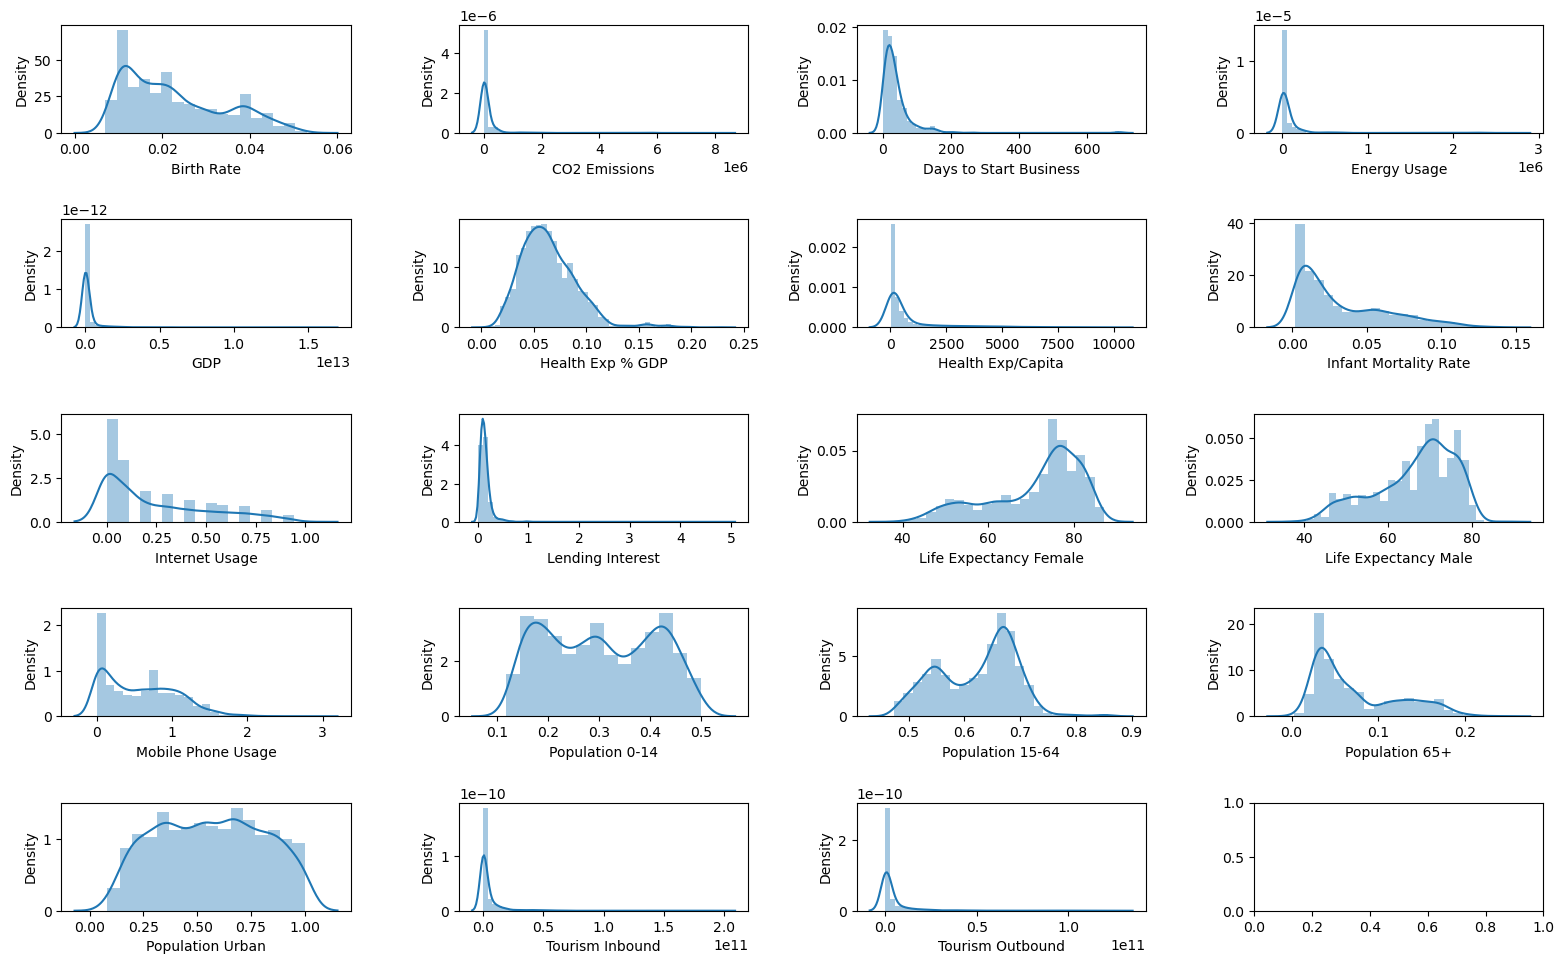

In [39]:
fig, axes=plt.subplots(5,4,figsize=(16,10),sharex=False,sharey=False)

sns.distplot(df_fill['Birth Rate'], ax=axes[0,0])
sns.distplot(df_fill['CO2 Emissions'], ax=axes[0,1])
sns.distplot(df_fill['Days to Start Business'], ax=axes[0,2])
sns.distplot(df_fill['Energy Usage'], ax=axes[0,3])
sns.distplot(df_fill['GDP'], ax=axes[1,0])
sns.distplot(df_fill['Health Exp % GDP'], ax=axes[1,1])
sns.distplot(df_fill['Health Exp/Capita'], ax=axes[1,2])
sns.distplot(df_fill['Infant Mortality Rate'], ax=axes[1,3])
sns.distplot(df_fill['Internet Usage'], ax=axes[2,0])
sns.distplot(df_fill['Lending Interest'], ax=axes[2,1])
sns.distplot(df_fill['Life Expectancy Female'], ax=axes[2,2])
sns.distplot(df_fill['Life Expectancy Male'], ax=axes[2,3])
sns.distplot(df_fill['Mobile Phone Usage'], ax=axes[3,0])
sns.distplot(df_fill['Population 0-14'], ax=axes[3,1])
sns.distplot(df_fill['Population 15-64'], ax=axes[3,2])
sns.distplot(df_fill['Population 65+'], ax=axes[3,3])
sns.distplot(df_fill['Population Urban'], ax=axes[4,0])
sns.distplot(df_fill['Tourism Inbound'], ax=axes[4,1])
sns.distplot(df_fill['Tourism Outbound'], ax=axes[4,2])

plt.tight_layout(pad=2.0)

1.Life Expectancy Female and Male & Population 15-64 are left skewed distribution.

2.Lendning Interest Rate, Mobile Phone Usage, Population 65 plus & Tourism Inbound and Outbound are right skewed distribution.

3.Population Urban is symmetrical distribution.

In [41]:
df_fill.isnull().sum()

Birth Rate                119
CO2 Emissions             579
Days to Start Business    986
Energy Usage              919
GDP                       210
Health Exp % GDP          309
Health Exp/Capita         309
Infant Mortality Rate     260
Internet Usage            173
Lending Interest          824
Life Expectancy Female    136
Life Expectancy Male      136
Mobile Phone Usage        167
Population 0-14           220
Population 15-64          220
Population 65+            220
Population Urban           26
Tourism Inbound           368
Tourism Outbound          471
dtype: int64

In [45]:
df_fill= df_fill.rename(columns={'Birth Rate': 'Birth_Rate','CO2 Emissions':'CO2_Emissions','Days to Start Business':'Days_to_Start_Business','Energy Usage':'Energy_Usage',
                            'Health Exp % GDP':'Health_Exp_GDP','Health Exp/Capita':'Health_Exp_Capita','Infant Mortality Rate':'Infant_Mortality_Rate','Internet Usage':'Internet_Usage','Lending Interest':'Lending_Interest',
                            'Life Expectancy Female':'Life_Expectancy_Female','Life Expectancy Male':'Life_Expectancy_Male','Mobile Phone Usage':'Mobile_Phone_Usage','Population 0-14':'Population_0to14',
                            'Population 15-64':'Population_15to64','Population 65+':'Population_65_above','Population Urban':'Population_Urban','Tourism Inbound':'Tourism_Inbound','Tourism Outbound':'Tourism_Outbound'})
df_fill.head()

,Birth_Rate,CO2_Emissions,Days_to_Start_Business,Energy_Usage,GDP,Health_Exp_GDP,Health_Exp_Capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65_above,Population_Urban,Tourism_Inbound,Tourism_Outbound
0,0.020,87931.0,NaN,26998.0,5.479006e+10,0.035,60.0,0.034,0.0,0.100,71.0,67.0,0.0,0.342,0.619,0.039,0.599,102000000.0,193000000.0
1,0.050,9542.0,NaN,7499.0,9.129595e+09,0.034,22.0,0.128,0.0,1.032,47.0,44.0,0.0,0.476,0.499,0.025,0.324,34000000.0,146000000.0
2,0.043,1617.0,NaN,1983.0,2.359122e+09,0.043,15.0,0.090,0.0,NaN,57.0,53.0,0.0,0.454,0.517,0.029,0.383,77000000.0,50000000.0
3,0.027,4276.0,NaN,1836.0,5.788312e+09,0.047,152.0,0.054,0.0,0.155,52.0,49.0,0.1,0.383,0.587,0.029,0.532,227000000.0,209000000.0
4,0.046,1041.0,NaN,NaN,2.610959e+09,0.051,12.0,0.096,0.0,NaN,52.0,49.0,0.0,0.468,0.505,0.028,0.178,23000000.0,30000000.0


In [47]:
for i in df_fill[['Birth_Rate','Health_Exp_GDP','Population_0to14','Population_15to64','Population_Urban']]:
    df_fill[i].fillna(df_fill[i].mean(),inplace=True)
df_fill

,Birth_Rate,CO2_Emissions,Days_to_Start_Business,Energy_Usage,GDP,Health_Exp_GDP,Health_Exp_Capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65_above,Population_Urban,Tourism_Inbound,Tourism_Outbound
0,0.020000,87931.0,NaN,26998.0,5.479006e+10,0.03500,60.0,0.034,0.0,0.100,71.0,67.0,0.0,0.342000,0.619000,0.039,0.599,1.020000e+08,1.930000e+08
1,0.050000,9542.0,NaN,7499.0,9.129595e+09,0.03400,22.0,0.128,0.0,1.032,47.0,44.0,0.0,0.476000,0.499000,0.025,0.324,3.400000e+07,1.460000e+08
2,0.043000,1617.0,NaN,1983.0,2.359122e+09,0.04300,15.0,0.090,0.0,NaN,57.0,53.0,0.0,0.454000,0.517000,0.029,0.383,7.700000e+07,5.000000e+07
3,0.027000,4276.0,NaN,1836.0,5.788312e+09,0.04700,152.0,0.054,0.0,0.155,52.0,49.0,0.1,0.383000,0.587000,0.029,0.532,2.270000e+08,2.090000e+08
4,0.046000,1041.0,NaN,NaN,2.610959e+09,0.05100,12.0,0.096,0.0,NaN,52.0,49.0,0.0,0.468000,0.505000,0.028,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.022715,NaN,NaN,NaN,NaN,0.06417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.303051,0.623481,NaN,0.911,NaN,NaN
2700,0.013000,NaN,5.0,2132446.0,1.624460e+13,0.17900,8895.0,0.006,0.8,0.033,81.0,76.0,1.0,0.196000,0.667000,0.136,0.811,2.000920e+11,1.265730e+11
2701,0.015000,NaN,7.0,NaN,5.000435e+10,0.08900,1308.0,0.010,0.5,0.112,80.0,74.0,1.5,0.220000,0.639000,0.140,0.948,2.222000e+09,1.028000e+09
2702,0.020000,NaN,144.0,NaN,3.812862e+11,0.04600,593.0,0.013,0.5,0.164,78.0,72.0,1.0,0.288000,0.652000,0.060,0.889,9.040000e+08,3.202000e+09


In [49]:
for i in df_fill[['CO2_Emissions','Days_to_Start_Business','Energy_Usage','GDP','Health_Exp_Capita','Infant_Mortality_Rate',
                 'Internet_Usage', 'Lending_Interest', 'Life_Expectancy_Female','Life_Expectancy_Male', 'Mobile_Phone_Usage',
                 'Population_65_above','Tourism_Inbound', 'Tourism_Outbound']]:
    df_fill[i].fillna(df_fill[i].median(),inplace=True)
df_fill

,Birth_Rate,CO2_Emissions,Days_to_Start_Business,Energy_Usage,GDP,Health_Exp_GDP,Health_Exp_Capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65_above,Population_Urban,Tourism_Inbound,Tourism_Outbound
0,0.020000,87931.0,26.0,26998.0,5.479006e+10,0.03500,60.0,0.034,0.0,0.100,71.0,67.0,0.0,0.342000,0.619000,0.039,0.599,1.020000e+08,1.930000e+08
1,0.050000,9542.0,26.0,7499.0,9.129595e+09,0.03400,22.0,0.128,0.0,1.032,47.0,44.0,0.0,0.476000,0.499000,0.025,0.324,3.400000e+07,1.460000e+08
2,0.043000,1617.0,26.0,1983.0,2.359122e+09,0.04300,15.0,0.090,0.0,0.120,57.0,53.0,0.0,0.454000,0.517000,0.029,0.383,7.700000e+07,5.000000e+07
3,0.027000,4276.0,26.0,1836.0,5.788312e+09,0.04700,152.0,0.054,0.0,0.155,52.0,49.0,0.1,0.383000,0.587000,0.029,0.532,2.270000e+08,2.090000e+08
4,0.046000,1041.0,26.0,14338.0,2.610959e+09,0.05100,12.0,0.096,0.0,0.120,52.0,49.0,0.0,0.468000,0.505000,0.028,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.022715,8529.0,26.0,14338.0,1.507975e+10,0.06417,193.0,0.020,0.1,0.120,75.0,69.0,0.5,0.303051,0.623481,0.052,0.911,6.885000e+08,4.560000e+08
2700,0.013000,8529.0,5.0,2132446.0,1.624460e+13,0.17900,8895.0,0.006,0.8,0.033,81.0,76.0,1.0,0.196000,0.667000,0.136,0.811,2.000920e+11,1.265730e+11
2701,0.015000,8529.0,7.0,14338.0,5.000435e+10,0.08900,1308.0,0.010,0.5,0.112,80.0,74.0,1.5,0.220000,0.639000,0.140,0.948,2.222000e+09,1.028000e+09
2702,0.020000,8529.0,144.0,14338.0,3.812862e+11,0.04600,593.0,0.013,0.5,0.164,78.0,72.0,1.0,0.288000,0.652000,0.060,0.889,9.040000e+08,3.202000e+09


In [51]:
df_fill.isnull().sum()   #checking empty rows

Birth_Rate                0
CO2_Emissions             0
Days_to_Start_Business    0
Energy_Usage              0
GDP                       0
Health_Exp_GDP            0
Health_Exp_Capita         0
Infant_Mortality_Rate     0
Internet_Usage            0
Lending_Interest          0
Life_Expectancy_Female    0
Life_Expectancy_Male      0
Mobile_Phone_Usage        0
Population_0to14          0
Population_15to64         0
Population_65_above       0
Population_Urban          0
Tourism_Inbound           0
Tourism_Outbound          0
dtype: int64

# VISUALIZATION

In [53]:
df_fill

,Birth_Rate,CO2_Emissions,Days_to_Start_Business,Energy_Usage,GDP,Health_Exp_GDP,Health_Exp_Capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65_above,Population_Urban,Tourism_Inbound,Tourism_Outbound
0,0.020000,87931.0,26.0,26998.0,5.479006e+10,0.03500,60.0,0.034,0.0,0.100,71.0,67.0,0.0,0.342000,0.619000,0.039,0.599,1.020000e+08,1.930000e+08
1,0.050000,9542.0,26.0,7499.0,9.129595e+09,0.03400,22.0,0.128,0.0,1.032,47.0,44.0,0.0,0.476000,0.499000,0.025,0.324,3.400000e+07,1.460000e+08
2,0.043000,1617.0,26.0,1983.0,2.359122e+09,0.04300,15.0,0.090,0.0,0.120,57.0,53.0,0.0,0.454000,0.517000,0.029,0.383,7.700000e+07,5.000000e+07
3,0.027000,4276.0,26.0,1836.0,5.788312e+09,0.04700,152.0,0.054,0.0,0.155,52.0,49.0,0.1,0.383000,0.587000,0.029,0.532,2.270000e+08,2.090000e+08
4,0.046000,1041.0,26.0,14338.0,2.610959e+09,0.05100,12.0,0.096,0.0,0.120,52.0,49.0,0.0,0.468000,0.505000,0.028,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.022715,8529.0,26.0,14338.0,1.507975e+10,0.06417,193.0,0.020,0.1,0.120,75.0,69.0,0.5,0.303051,0.623481,0.052,0.911,6.885000e+08,4.560000e+08
2700,0.013000,8529.0,5.0,2132446.0,1.624460e+13,0.17900,8895.0,0.006,0.8,0.033,81.0,76.0,1.0,0.196000,0.667000,0.136,0.811,2.000920e+11,1.265730e+11
2701,0.015000,8529.0,7.0,14338.0,5.000435e+10,0.08900,1308.0,0.010,0.5,0.112,80.0,74.0,1.5,0.220000,0.639000,0.140,0.948,2.222000e+09,1.028000e+09
2702,0.020000,8529.0,144.0,14338.0,3.812862e+11,0.04600,593.0,0.013,0.5,0.164,78.0,72.0,1.0,0.288000,0.652000,0.060,0.889,9.040000e+08,3.202000e+09


In [28]:
#1.Boxplot for outlier detection and removal

In [55]:
df2=df_fill.iloc[:,1:]

In [57]:
df2

,CO2_Emissions,Days_to_Start_Business,Energy_Usage,GDP,Health_Exp_GDP,Health_Exp_Capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65_above,Population_Urban,Tourism_Inbound,Tourism_Outbound
0,87931.0,26.0,26998.0,5.479006e+10,0.03500,60.0,0.034,0.0,0.100,71.0,67.0,0.0,0.342000,0.619000,0.039,0.599,1.020000e+08,1.930000e+08
1,9542.0,26.0,7499.0,9.129595e+09,0.03400,22.0,0.128,0.0,1.032,47.0,44.0,0.0,0.476000,0.499000,0.025,0.324,3.400000e+07,1.460000e+08
2,1617.0,26.0,1983.0,2.359122e+09,0.04300,15.0,0.090,0.0,0.120,57.0,53.0,0.0,0.454000,0.517000,0.029,0.383,7.700000e+07,5.000000e+07
3,4276.0,26.0,1836.0,5.788312e+09,0.04700,152.0,0.054,0.0,0.155,52.0,49.0,0.1,0.383000,0.587000,0.029,0.532,2.270000e+08,2.090000e+08
4,1041.0,26.0,14338.0,2.610959e+09,0.05100,12.0,0.096,0.0,0.120,52.0,49.0,0.0,0.468000,0.505000,0.028,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,8529.0,26.0,14338.0,1.507975e+10,0.06417,193.0,0.020,0.1,0.120,75.0,69.0,0.5,0.303051,0.623481,0.052,0.911,6.885000e+08,4.560000e+08
2700,8529.0,5.0,2132446.0,1.624460e+13,0.17900,8895.0,0.006,0.8,0.033,81.0,76.0,1.0,0.196000,0.667000,0.136,0.811,2.000920e+11,1.265730e+11
2701,8529.0,7.0,14338.0,5.000435e+10,0.08900,1308.0,0.010,0.5,0.112,80.0,74.0,1.5,0.220000,0.639000,0.140,0.948,2.222000e+09,1.028000e+09
2702,8529.0,144.0,14338.0,3.812862e+11,0.04600,593.0,0.013,0.5,0.164,78.0,72.0,1.0,0.288000,0.652000,0.060,0.889,9.040000e+08,3.202000e+09


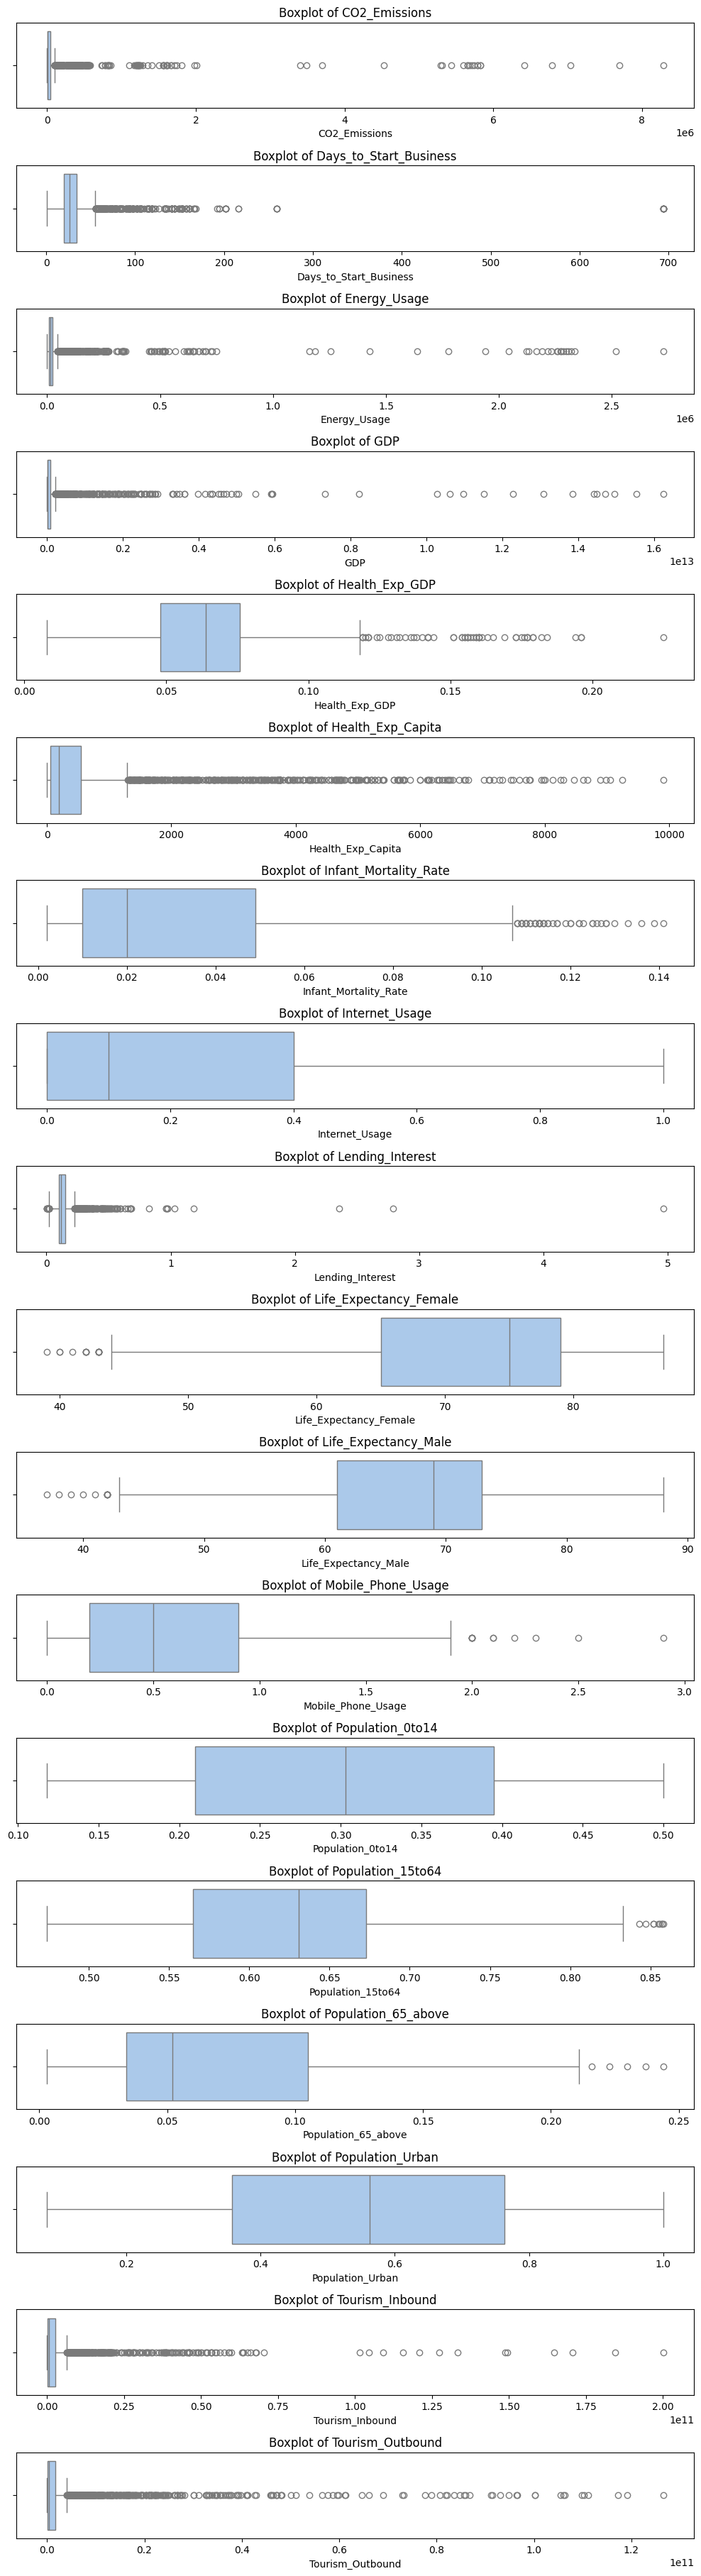

In [31]:
plt.figure(figsize=(10,40))
for i,cols in enumerate(df2,start=1):
    plt.subplot(20,1,i)
    sns.boxplot(df2[cols],orient='h',palette='pastel')
    plt.xlabel(cols)
    plt.title(f'Boxplot of {cols}')
plt.tight_layout()
plt.show()

In [59]:
## Outlier removal
Q1 = df_fill.quantile(0.25)
Q3 = df_fill.quantile(0.75)
IQR = Q3 - Q1

df_out= df_fill[~((df_fill < (Q1 - 1.5 * IQR)) | (df_fill > (Q3 + 1.5 * IQR))).any(axis=1)]

In [61]:
df_out

,Birth_Rate,CO2_Emissions,Days_to_Start_Business,Energy_Usage,GDP,Health_Exp_GDP,Health_Exp_Capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65_above,Population_Urban,Tourism_Inbound,Tourism_Outbound
0,0.020000,87931.0,26.0,26998.0,5.479006e+10,0.03500,60.0,0.034,0.0,0.100,71.0,67.0,0.0,0.342000,0.619000,0.039,0.599000,102000000.0,193000000.0
2,0.043000,1617.0,26.0,1983.0,2.359122e+09,0.04300,15.0,0.090,0.0,0.120,57.0,53.0,0.0,0.454000,0.517000,0.029,0.383000,77000000.0,50000000.0
3,0.027000,4276.0,26.0,1836.0,5.788312e+09,0.04700,152.0,0.054,0.0,0.155,52.0,49.0,0.1,0.383000,0.587000,0.029,0.532000,227000000.0,209000000.0
4,0.046000,1041.0,26.0,14338.0,2.610959e+09,0.05100,12.0,0.096,0.0,0.120,52.0,49.0,0.0,0.468000,0.505000,0.028,0.178000,23000000.0,30000000.0
5,0.042000,301.0,26.0,14338.0,8.704861e+08,0.06300,7.0,0.092,0.0,0.158,49.0,47.0,0.0,0.490000,0.481000,0.029,0.082000,1400000.0,14000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,0.016000,8529.0,26.0,14338.0,1.507975e+10,0.06417,193.0,0.020,0.1,0.120,82.0,76.0,0.5,0.303051,0.623481,0.052,0.562953,688500000.0,456000000.0
2696,0.017000,8529.0,10.0,14338.0,6.944444e+08,0.05200,340.0,0.018,0.5,0.094,75.0,70.0,1.2,0.257000,0.675000,0.068,0.495000,93000000.0,14000000.0
2698,0.015000,8529.0,41.0,14338.0,2.343634e+10,0.05400,972.0,0.020,0.6,0.077,74.0,66.0,1.4,0.207000,0.705000,0.088,0.088000,688500000.0,456000000.0
2699,0.022715,8529.0,26.0,14338.0,1.507975e+10,0.06417,193.0,0.020,0.1,0.120,75.0,69.0,0.5,0.303051,0.623481,0.052,0.911000,688500000.0,456000000.0


In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CO2_Emissions           2704 non-null   float64
 1   Days_to_Start_Business  2704 non-null   float64
 2   Energy_Usage            2704 non-null   float64
 3   GDP                     2704 non-null   float64
 4   Health_Exp_GDP          2704 non-null   float64
 5   Health_Exp_Capita       2704 non-null   float64
 6   Infant_Mortality_Rate   2704 non-null   float64
 7   Internet_Usage          2704 non-null   float64
 8   Lending_Interest        2704 non-null   float64
 9   Life_Expectancy_Female  2704 non-null   float64
 10  Life_Expectancy_Male    2704 non-null   float64
 11  Mobile_Phone_Usage      2704 non-null   float64
 12  Population_0to14        2704 non-null   float64
 13  Population_15to64       2704 non-null   float64
 14  Population_65_above     2704 non-null   

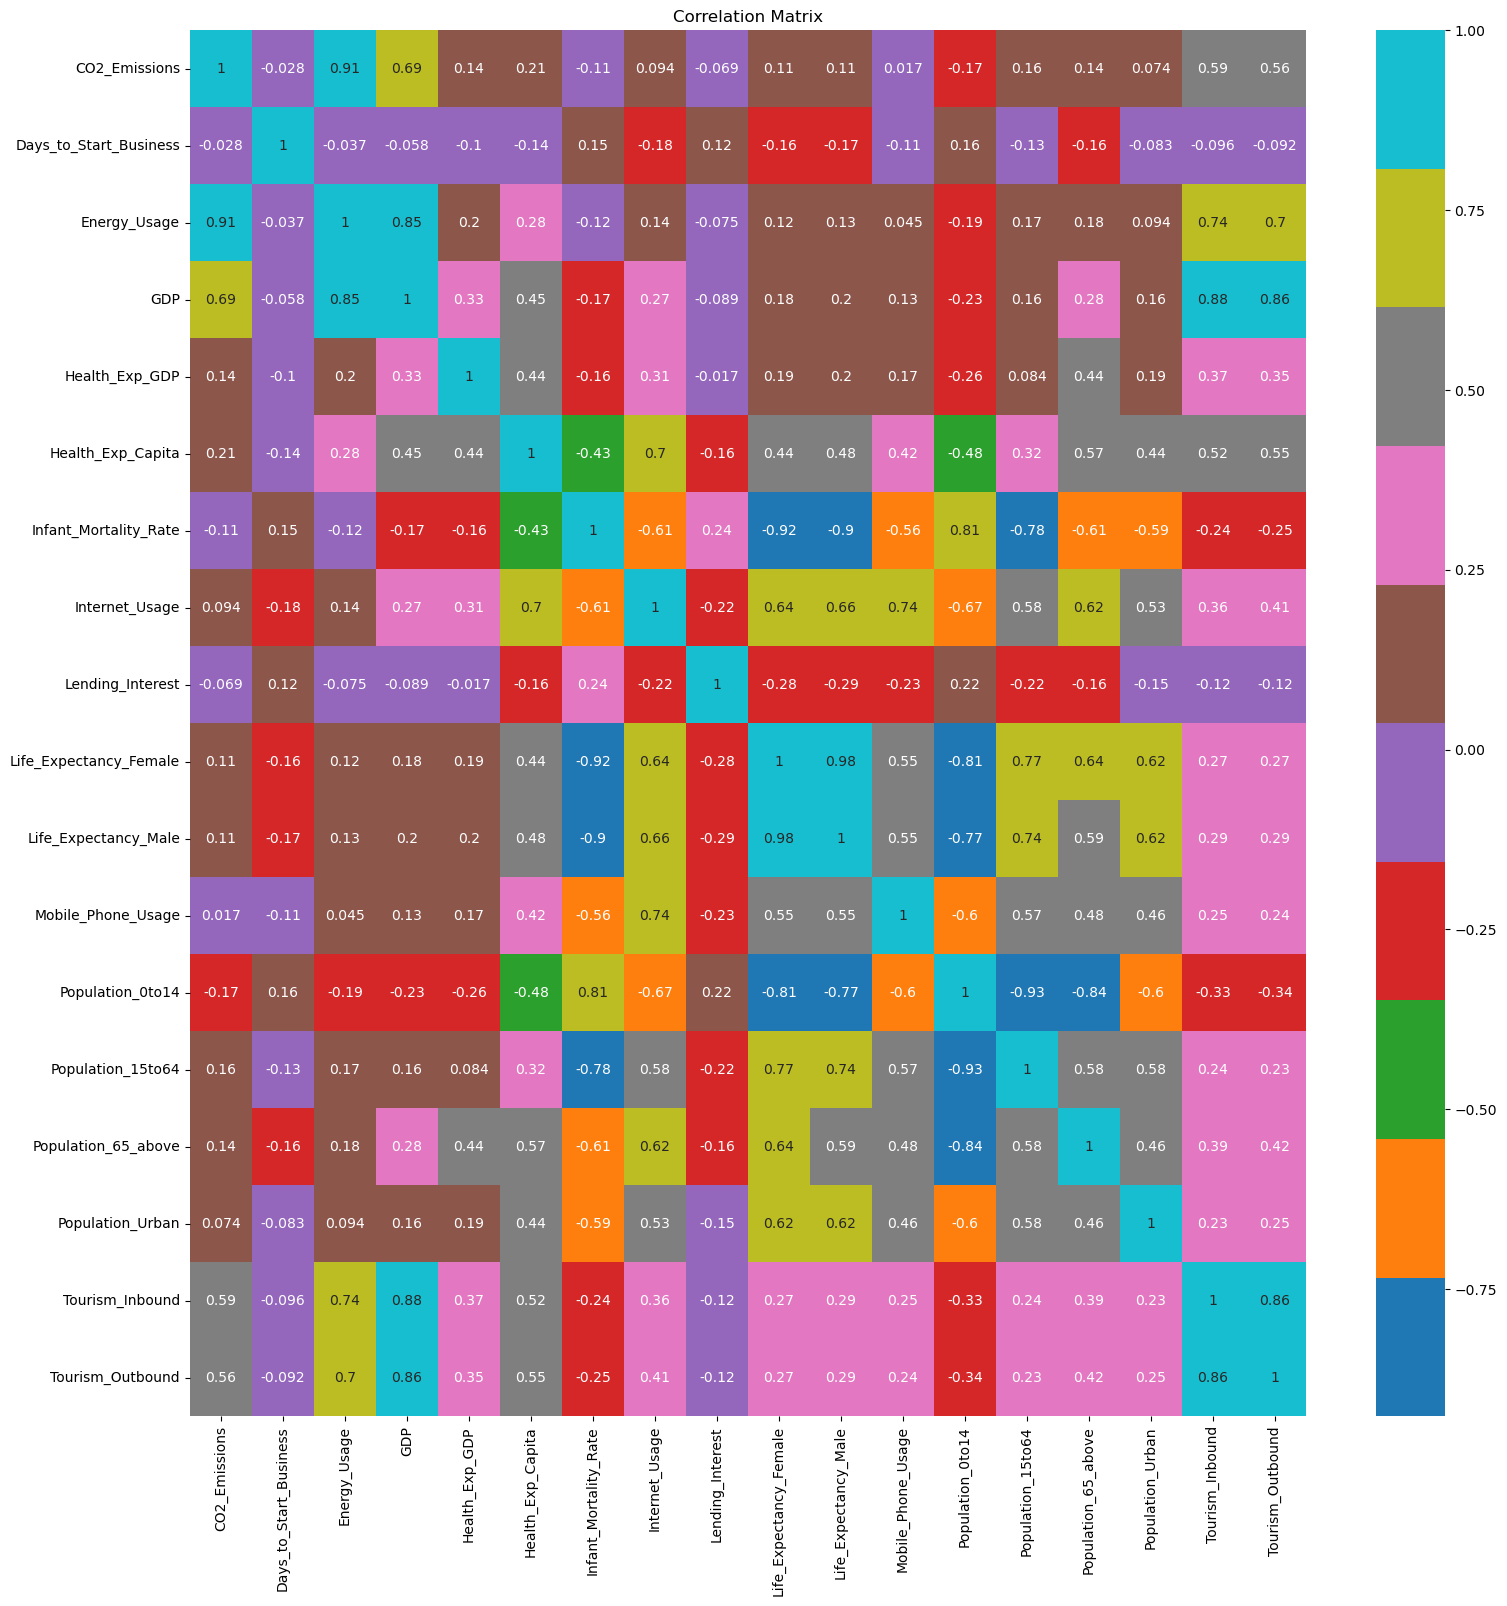

In [65]:
plt.figure(figsize=(18,18))
sns.heatmap(df2.corr(),annot=True,cmap='tab10')
plt.title('Correlation Matrix')
plt.show()

1. Energy Usage and CO2 Emissions are highly positively correlated(r=0.91), The Energy causing high CO2 Emissions
2. Strong Positive correlation(r=0.96) between Population of 0 to 14 and the Birth Rate, in general the population from 0 to 14 directly depends on Birth Rate. If the Birth_Rate increases the Population from 0 to 14 increases, vice versa.
3. Highly Negative correlation(r=-0.92) between Life Expectancy Female and Infant Mortality Rate & (r=-0.90) Life Expectancy Male and Infant Mortality Rate, Life expectancy of both male and female highly affected by infant mortality.
4. Tourism Inbound, Tourism Outbound and Energy Usage are positively correlated with GDP respectively 0.88, 0.86 & 0.85 this means countries with high GDP tend to attract more international tourists and consumes more energy.

In [67]:
# By using GroupBy, extracting the top GDP countries
highest_gdp = df1.groupby('Country')['GDP'].max()
highest_gdp=highest_gdp.sort_values(ascending=False)
highest_gdp.head(8)

Country
United States     1.624460e+13
China             8.229490e+12
Japan             5.937767e+12
Germany           3.628110e+12
United Kingdom    2.857083e+12
France            2.831795e+12
Brazil            2.476695e+12
Italy             2.307312e+12
Name: GDP, dtype: float64

In [69]:
US_data = df1[df1['Country']=='United States']
China_data = df1[df1['Country']=='China']
Japan_data = df1[df1['Country']=='Japan']
Germany_data = df1[df1['Country']=='Germany']
UK_data = df1[df1['Country']=='United Kingdom']
China_data = df1[df1['Country']=='China']
France_data = df1[df1['Country']=='France']
Brazil_data = df1[df1['Country']=='Brazil']
Italy_data = df1[df1['Country']=='Italy']
US_data

,Birth Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
204,0.014,5713560.0,United States,NaN,2273332.0,1.028970e+13,0.136,4790.0,0.007,0.4,...,74.0,0.4,1,0.213,0.663,0.124,282162411,0.791,1.209120e+11,9.147300e+10
412,0.014,5601405.0,United States,NaN,2230817.0,1.062530e+13,0.142,5138.0,0.007,0.5,...,74.0,0.4,1,0.212,0.665,0.123,284968955,0.792,1.091030e+11,8.561000e+10
620,0.014,5650950.0,United States,NaN,2255957.0,1.098020e+13,0.151,5578.0,0.007,0.6,...,74.0,0.5,1,0.210,0.667,0.123,287625193,0.794,1.044270e+11,8.186000e+10
828,0.014,5681664.0,United States,6.0,2261151.0,1.151220e+13,0.156,5993.0,0.007,0.6,...,75.0,0.5,1,0.209,0.669,0.123,290107933,0.796,1.015350e+11,8.209100e+10
1036,0.014,5790765.0,United States,6.0,2307819.0,1.227700e+13,0.157,6355.0,0.007,0.6,...,75.0,0.6,1,0.207,0.670,0.123,292805298,0.798,1.156890e+11,9.476400e+10
1244,0.014,5826394.0,United States,6.0,2318861.0,1.309540e+13,0.158,6732.0,0.007,0.7,...,75.0,0.7,1,0.205,0.671,0.123,295516599,0.799,1.272370e+11,1.002500e+11
1452,0.014,5737616.0,United States,6.0,2296686.0,1.385790e+13,0.159,7110.0,0.007,0.7,...,75.0,0.8,1,0.204,0.672,0.124,298379912,0.801,1.333930e+11,1.054760e+11
1660,0.014,5828697.0,United States,6.0,2337014.0,1.448030e+13,0.161,7486.0,0.007,0.8,...,75.0,0.8,1,0.202,0.673,0.125,301231207,0.803,1.488460e+11,1.111020e+11
1868,0.014,5656839.0,United States,5.0,2277034.0,1.472030e+13,0.165,7769.0,0.007,0.7,...,76.0,0.9,1,0.201,0.673,0.127,304093966,0.804,1.705240e+11,1.192170e+11
2076,0.014,5311840.0,United States,5.0,2164458.0,1.441790e+13,0.177,8009.0,0.006,0.7,...,76.0,0.9,1,0.200,0.672,0.128,306771529,0.806,1.495100e+11,1.062850e+11


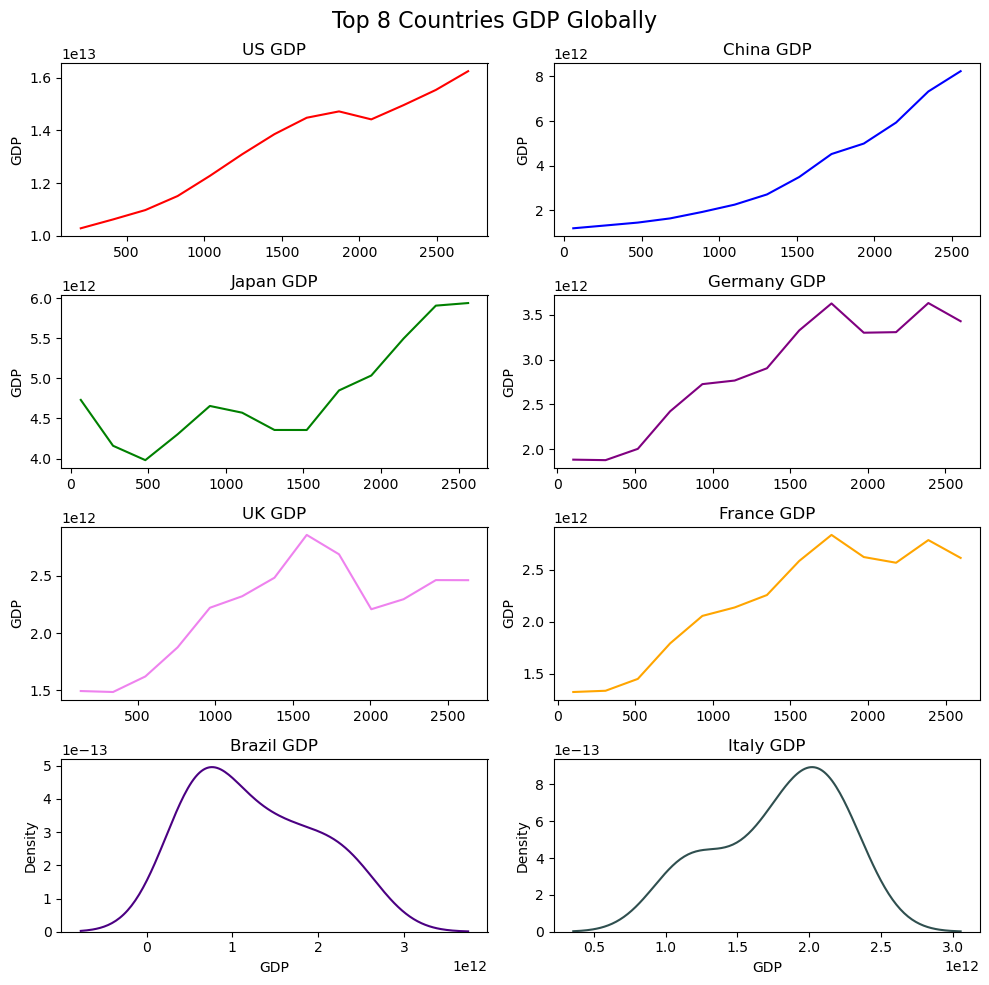

In [71]:
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(10,10))

sns.lineplot(ax=axes[0,0], data=US_data['GDP'],  color='red')
sns.lineplot(ax=axes[0,1], data=China_data['GDP'],  color='blue')
sns.lineplot(ax=axes[1,0], data=Japan_data['GDP'],  color='green')
sns.lineplot(ax=axes[1,1], data=Germany_data['GDP'],  color='purple')
sns.lineplot(ax=axes[2,0], data=UK_data['GDP'],  color='violet')
sns.lineplot(ax=axes[2,1], data=France_data['GDP'],  color='orange')
sns.kdeplot(ax=axes[3,0], data=Brazil_data['GDP'], color='indigo')
sns.kdeplot(ax=axes[3,1], data=Italy_data['GDP'], color='darkslategrey')

#Set plot titles and labels
axes[0,0].set_title('US GDP')
axes[0,1].set_title('China GDP')
axes[1,0].set_title('Japan GDP')
axes[1,1].set_title('Germany GDP')
axes[2,0].set_title('UK GDP')
axes[2,1].set_title('France GDP')
axes[3,0].set_title('Brazil GDP')
axes[3,1].set_title('Italy GDP')

fig.suptitle('Top 8 Countries GDP Globally', fontsize=16)
plt.tight_layout()
plt.show()

1.We can observe that the countries US, China, Japan, Germany, UK, France are having higher GDP

2.Brazil, Italy are facing lower GDP

In [73]:
important_col = df1['Country']

In [75]:
df_fill.insert(0,'Country',important_col)

In [77]:
df_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2704 non-null   object 
 1   Birth_Rate              2704 non-null   float64
 2   CO2_Emissions           2704 non-null   float64
 3   Days_to_Start_Business  2704 non-null   float64
 4   Energy_Usage            2704 non-null   float64
 5   GDP                     2704 non-null   float64
 6   Health_Exp_GDP          2704 non-null   float64
 7   Health_Exp_Capita       2704 non-null   float64
 8   Infant_Mortality_Rate   2704 non-null   float64
 9   Internet_Usage          2704 non-null   float64
 10  Lending_Interest        2704 non-null   float64
 11  Life_Expectancy_Female  2704 non-null   float64
 12  Life_Expectancy_Male    2704 non-null   float64
 13  Mobile_Phone_Usage      2704 non-null   float64
 14  Population_0to14        2704 non-null   

In [79]:
df3 = df_fill.copy()

# Standardize the 'Country' column (e.g., remove leading/trailing spaces and lower case)
df3['Country'] = df3['Country'].str.strip().str.lower()

# Remove duplicates after standardizing
df3 = df3.drop_duplicates(subset='Country')

print(f"After dropping duplicates: {df3.duplicated().sum()} duplicates")


After dropping duplicates: 0 duplicates


### Visualization of Top 15 countries with each column in descending order   

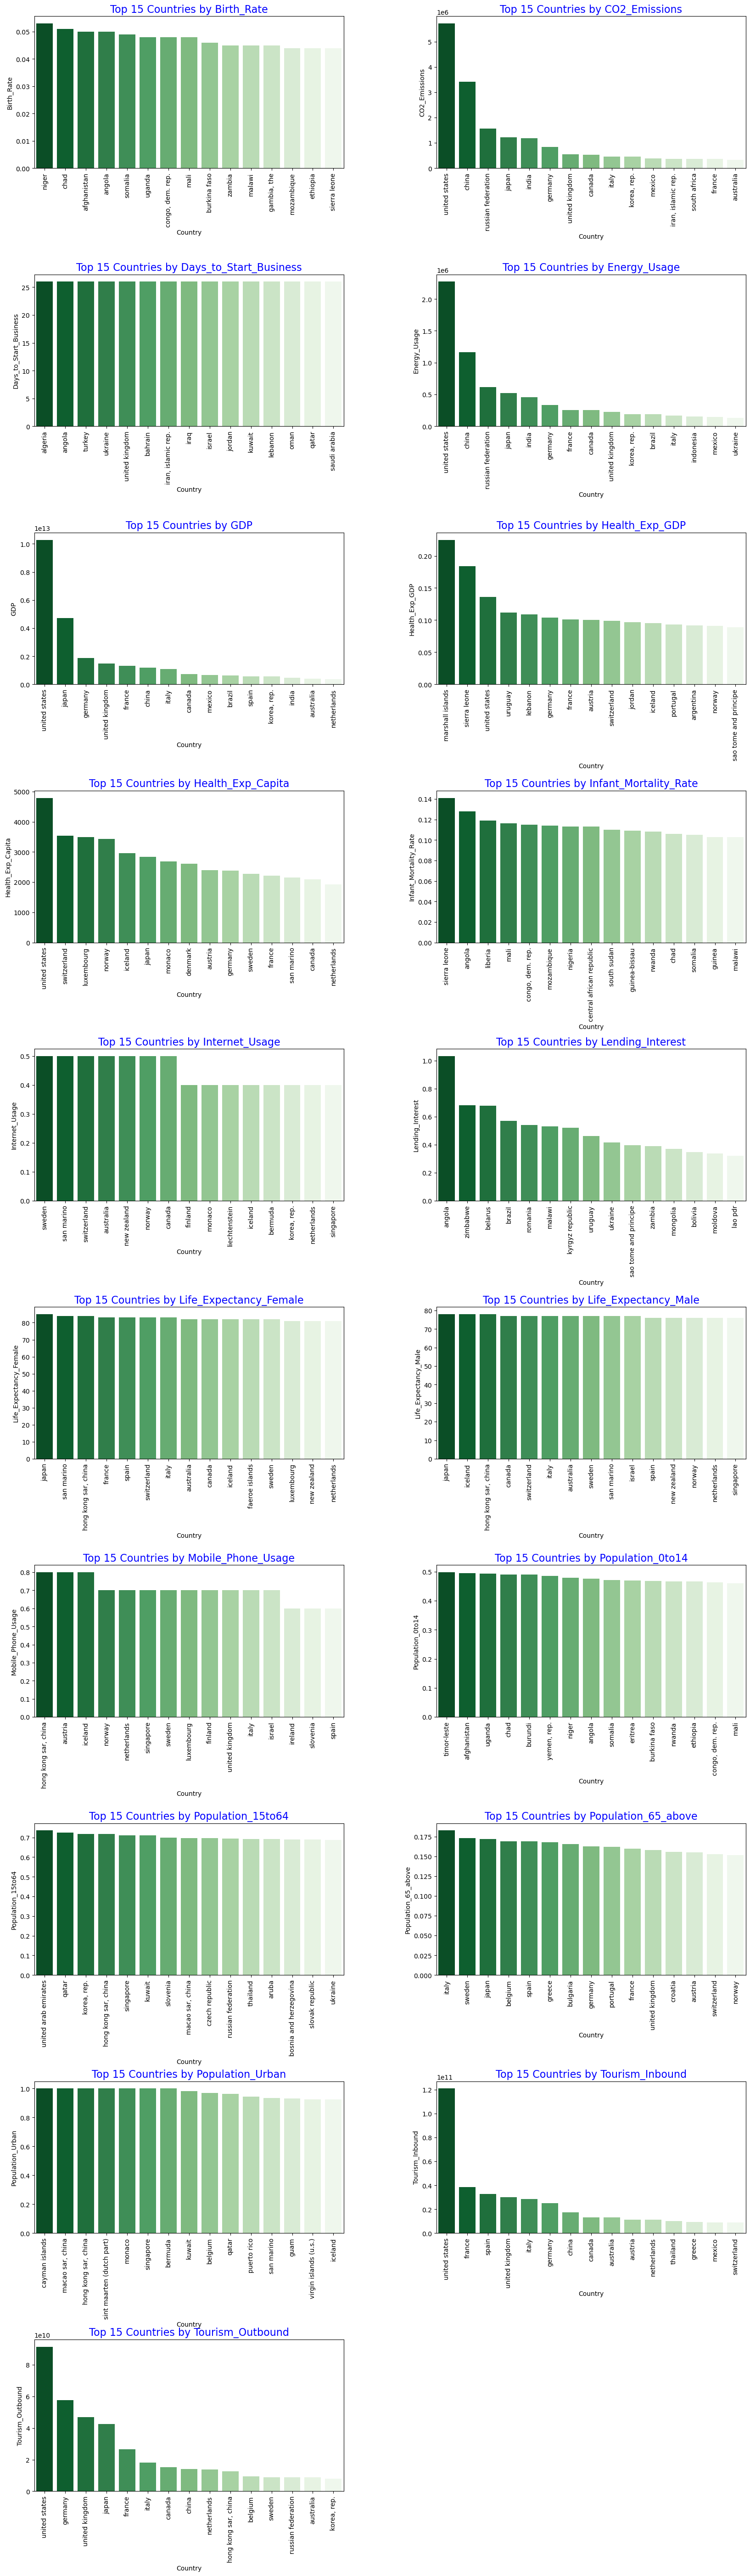

In [81]:
fig, axs = plt.subplots(10,2,sharex=False,sharey=False,figsize=(20,70))
plt.subplots_adjust(wspace=0.3, hspace=0.7)
counter = 0

for column in df3.columns[1:]:
    x = counter // 2  # Determine row position
    y = counter % 2   # Determine column position

    # Sort the dataframe by the current column in descending order and pick top 15 countries
    df_top15 = df3[['Country', column]].dropna().sort_values(by=column, ascending=False).head(15)

    # Create a barplot
    sns.barplot(x='Country', y=column, data=df_top15, ax=axs[x, y], palette = 'Greens_r')

    # Set the title and rotate the x-axis labels for better readability
    axs[x, y].set_title(f"Top 15 Countries by {column}", fontdict={'fontsize': 16, 'color': 'blue'})
    axs[x, y].tick_params(axis='x', rotation=90)

    counter+=1

# Remove unused subplots if the number of columns is odd
if len(df3.columns[1:]) % 2 != 0:
    fig.delaxes(axs[-1, -1])

#fig.savefig('Top15.jpg',dpi=500)
plt.show()

### Visualization of Top 15 countries with each column in Ascending order

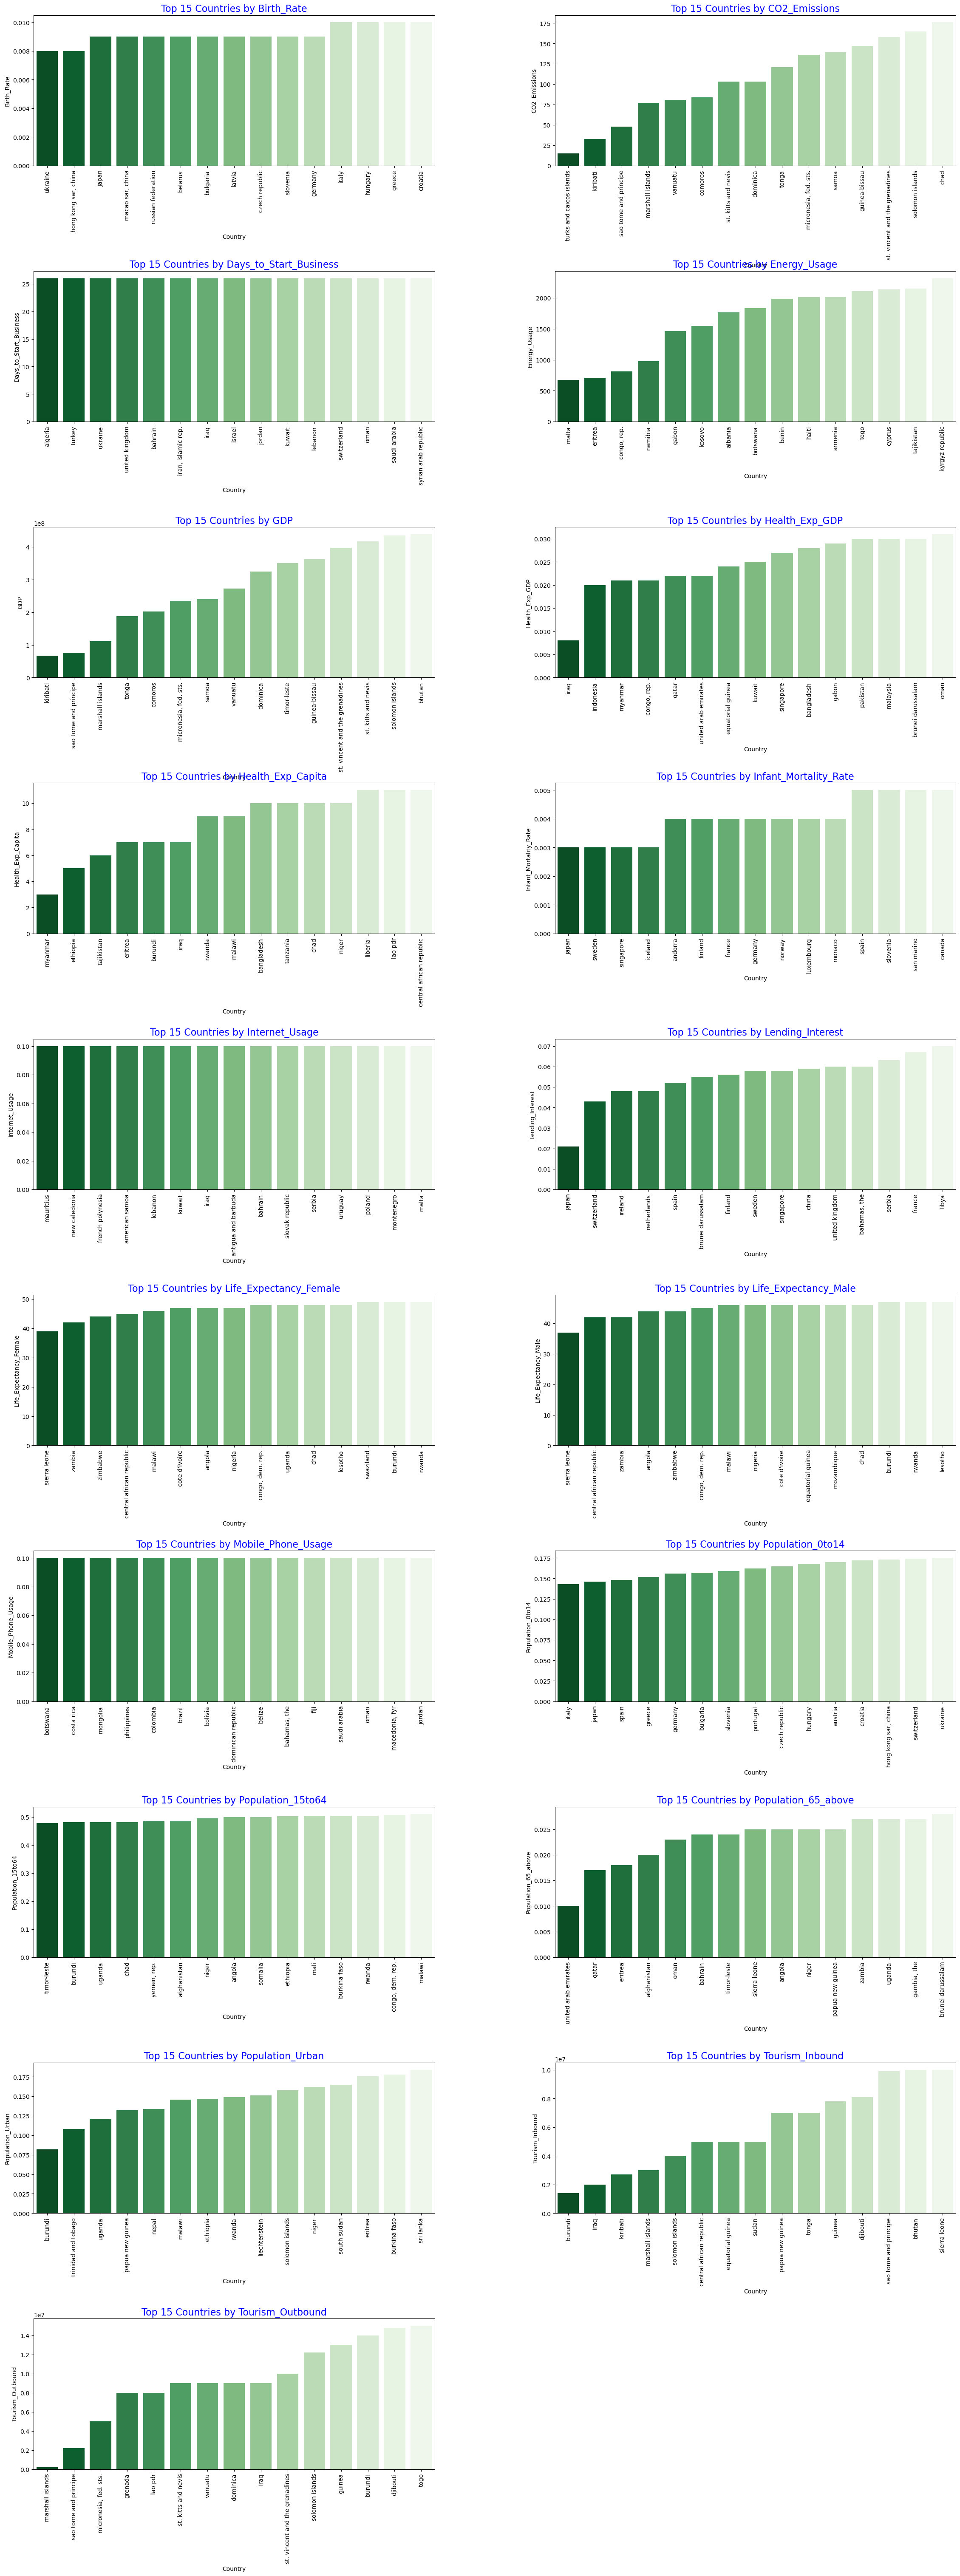

In [84]:
fig, axs = plt.subplots(10,2,sharex=False,sharey=False,figsize=(28,75))
plt.subplots_adjust(wspace=0.3, hspace=0.7)
counter = 0

for column in df3.columns[1:]:
    x = counter // 2  # Determine row position
    y = counter % 2   # Determine column position

    # Sort the dataframe by the current column in descending order and pick top 15 countries
    df_top15 = df3[['Country', column]].dropna()
    df_top15 = df_top15[df_top15[column] > 0]

     # If there are enough valid data points, sort and plot
    if len(df_top15) > 0:
        df_top15 = df_top15.sort_values(by=column, ascending=True).head(15)


        # Create a barplot
        sns.barplot(x='Country', y=column, data=df_top15, ax=axs[x, y], palette = 'Greens_r')

        # Set the title and rotate the x-axis labels for better readability
        axs[x, y].set_title(f"Top 15 Countries by {column}", fontdict={'fontsize': 16, 'color': 'blue'})
        axs[x, y].tick_params(axis='x', rotation=90)

    else:
        axs[x, y].text(0.5, 0.5, 'No valid data to plot', horizontalalignment='center', verticalalignment='center')

    counter+=1

# Remove unused subplots if the number of columns is odd
if len(df3.columns[1:]) % 2 != 0:
    fig.delaxes(axs[-1, -1])


#fig.savefig('Top15.jpg',dpi=500)
plt.show()

## K-mean Clustering

[[-3.91246399e-01  3.92686651e+00  1.92528856e-02 ...  3.81561466e-01
  -6.93026906e-01 -4.81047295e-01]
 [ 1.74095414e+00 -5.82147907e-01  1.92528856e-02 ... -5.12481777e-01
  -7.18041204e-01 -7.43867437e-01]
 [ 2.57684198e-01 -4.43242639e-01  1.92528856e-02 ...  1.04242497e-01
  -5.67955415e-01 -4.51640846e-01]
 ...
 [-8.54768255e-01 -2.21067345e-01  1.51312109e+00 ... -1.73351306e+00
  -1.06191473e-01  2.32121805e-03]
 [-1.39563894e-01 -2.21067345e-01  1.92528856e-02 ...  1.67295726e+00
  -1.06191473e-01  2.32121805e-03]
 [-1.22558574e+00 -2.21067345e-01  1.92528856e-02 ...  1.83024265e+00
  -1.06191473e-01  2.32121805e-03]]


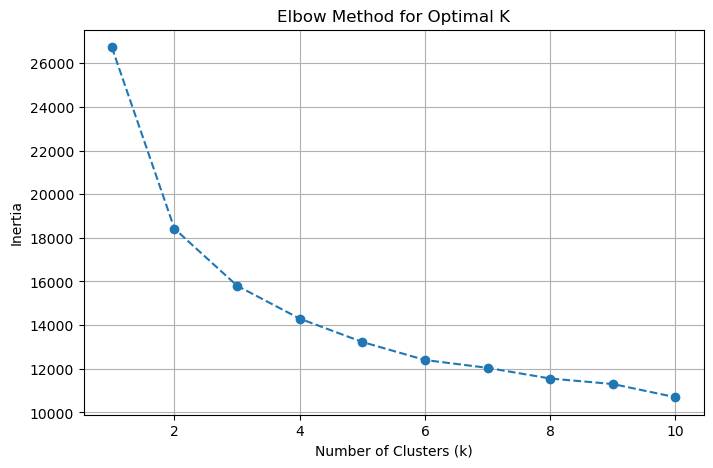

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_out.dropna())
print(scaled_data)
# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


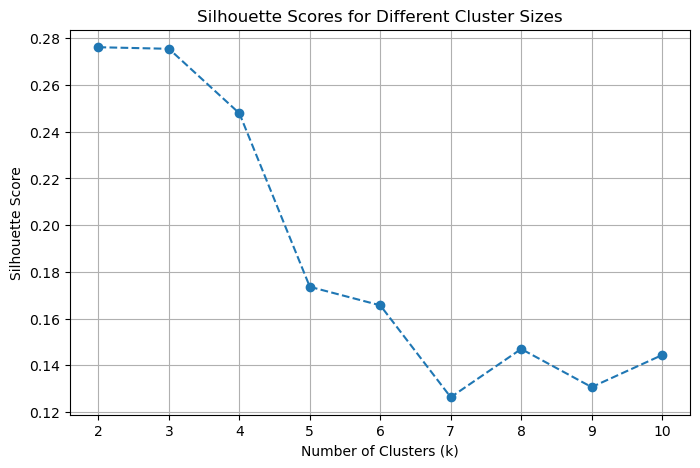

K-Means: 0.14438941850053613


In [86]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
k_values = range(2, 11)  # Start from 2 clusters, as silhouette is undefined for k=1

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)
    
# Plot the silhouette scores
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Cluster Sizes')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

print("K-Means:", silhouette_score(scaled_data, kmeans.labels_))

###  Hierarchical Clustering

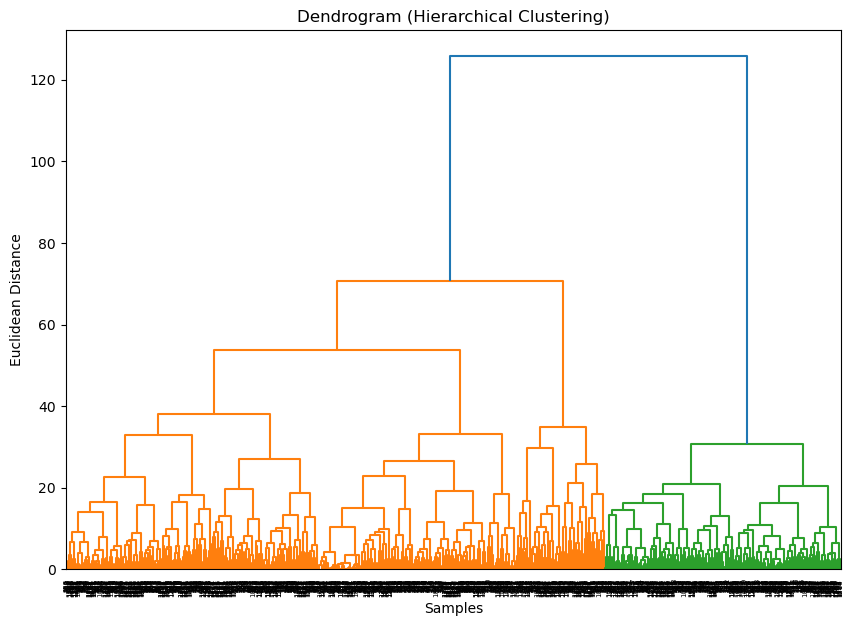

In [90]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linked = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()


In [91]:
from scipy.cluster.hierarchy import fcluster

# Choose the number of clusters or distance threshold
num_clusters = 4
clusters_hierarchical = fcluster(linked, num_clusters, criterion='maxclust')
clusters_hierarchical
print("Hierarchical:", silhouette_score(scaled_data, clusters_hierarchical))

Hierarchical: 0.1609738731239196


## Agglomerative Clustering

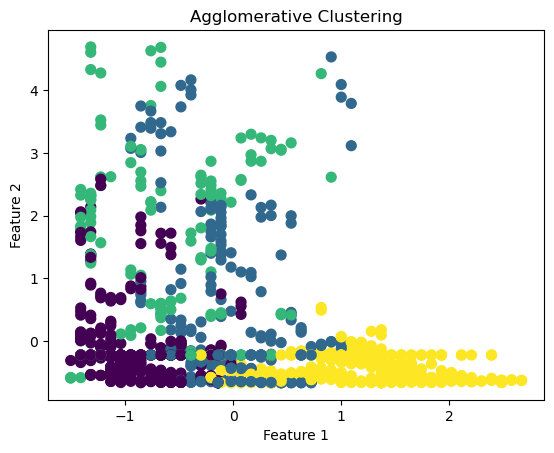

Agglomerative: 0.1609738731239196


In [92]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=4,  linkage='ward')
clusters_agglo = agglomerative.fit_predict(scaled_data)

# Visualize clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters_agglo, cmap='viridis', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
print("Agglomerative:", silhouette_score(scaled_data, clusters_agglo))

### DBSCAN

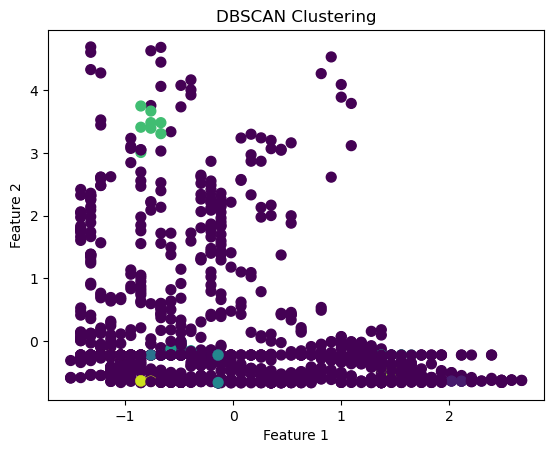

DBSCAN: -0.3573078247395766


In [97]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust `eps` and `min_samples` as needed
clusters_dbscan = dbscan.fit_predict(scaled_data)

# Visualize clusters (2D projection if needed)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters_dbscan, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
print("DBSCAN:", silhouette_score(scaled_data, clusters_dbscan))

In [99]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for each technique
print("K-Means:", silhouette_score(scaled_data, kmeans.labels_))
print("Hierarchical:", silhouette_score(scaled_data, clusters_hierarchical))
print("DBSCAN:", silhouette_score(scaled_data, clusters_dbscan))
print("Agglomerative:", silhouette_score(scaled_data, clusters_agglo))

K-Means: 0.14438941850053613
Hierarchical: 0.1609738731239196
DBSCAN: -0.3573078247395766
Agglomerative: 0.1609738731239196


##### The silhouette score is a metric that measures how well data points fit within their assigned clusters. It ranges from -1 to 1:

- Close to 1: Indicates well-separated clusters.
- Close to 0: Indicates overlapping clusters.
- Negative values: Indicate misclassified points.

##### From the silhouette score Hierarchical Clustering is best fit for this dataset

In [118]:
# Model Evaluation: Silhouette Scores
scores = {}

# Silhouette scores for methods with sufficient clusters
scores["K-Means"] = silhouette_score(scaled_data, kmeans_labels)
scores["Hierarchical"] = silhouette_score(scaled_data, clusters_hierarchical)
scores["Agglomerative"] = silhouette_score(scaled_data, clusters_agglo)

# Handle DBSCAN separately
if len(set(clusters_dbscan)) > 1:  # Ensure there are at least 2 clusters
    dbscan_filtered_data = scaled_data[clusters_dbscan != -1]
    dbscan_filtered_labels = clusters_dbscan[clusters_dbscan != -1]
    scores["DBSCAN (excluding noise)"] = silhouette_score(dbscan_filtered_data, dbscan_filtered_labels)
else:
    scores["DBSCAN (excluding noise)"] = "Not enough clusters"

# Print Silhouette Scores
print("Silhouette Scores:")
for method, score in scores.items():
    if isinstance(score, (int, float)):
        print(f"{method}: {score:.3f}")
    else:
        print(f"{method}: {score}")

# Rank Clustering Methods
ranked_scores = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1] if isinstance(item[1], (int, float)) else -1, reverse=True)}
print("\nRanked Methods by Silhouette Score:")
for method, score in ranked_scores.items():
    if isinstance(score, (int, float)):
        print(f"{method}: {score:.3f}")
    else:
        print(f"{method}: {score}")

Silhouette Scores:
K-Means: 0.248
Hierarchical: 0.161
Agglomerative: 0.161
DBSCAN (excluding noise): 0.754

Ranked Methods by Silhouette Score:
DBSCAN (excluding noise): 0.754
K-Means: 0.248
Hierarchical: 0.161
Agglomerative: 0.161


In [129]:
# Initialize the ClusterEvaluator with the DataFrame (df_out is assumed to be your data)
evaluator = ClusterEvaluator(df_out)

# Preprocess the data
evaluator.preprocess_data()



Evaluation Results for K-means
--------------------------------------------------

Internal Metrics:
silhouette_score: 0.248
calinski_harabasz_score: 406.763
davies_bouldin_score: 1.589

Cluster Sizes:
Cluster 0: 635 samples
Cluster 3: 435 samples
Cluster 1: 213 samples
Cluster 2: 124 samples


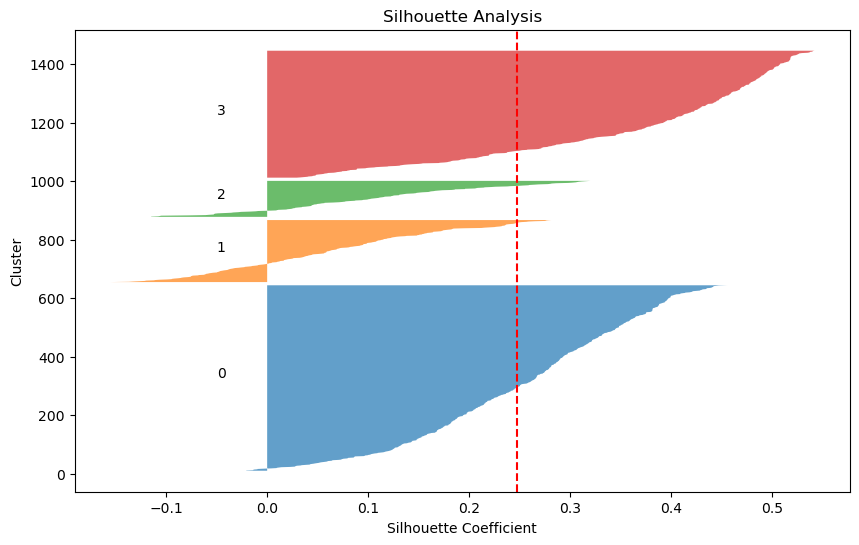

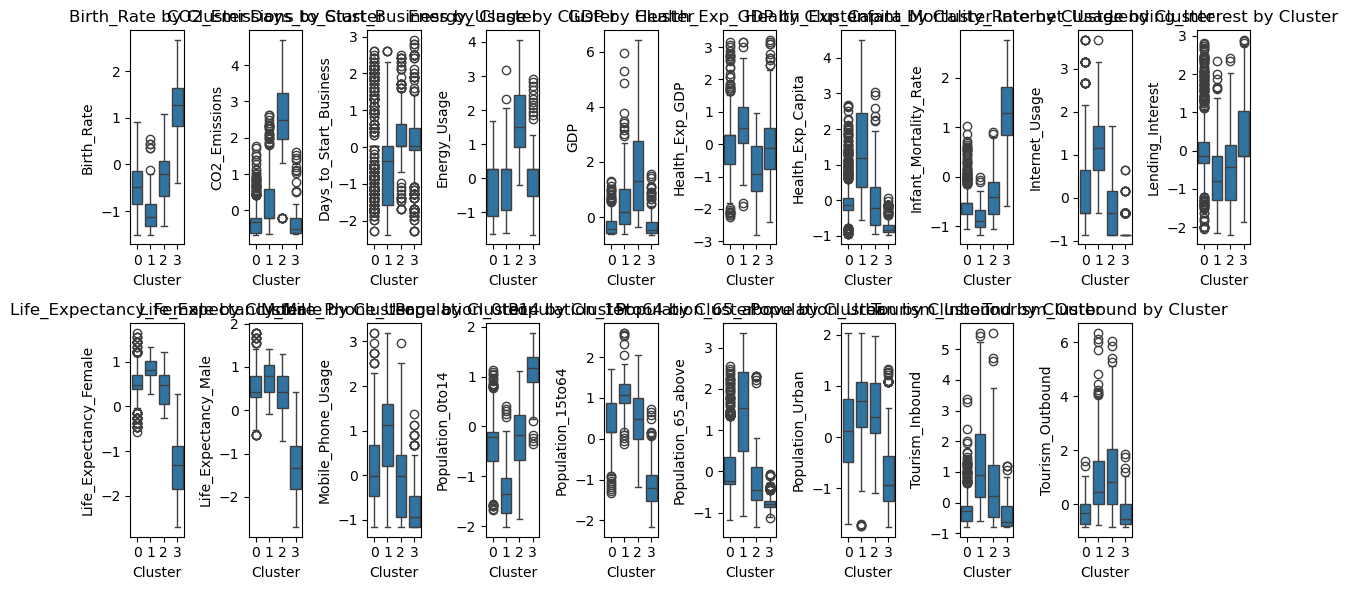

{'internal_metrics': {'silhouette_score': 0.24787331292563175,
  'calinski_harabasz_score': 406.76291409192976,
  'davies_bouldin_score': 1.5887627639444921},
 'external_metrics': {},
 'n_clusters': 4,
 'cluster_sizes': {0: 635, 3: 435, 1: 213, 2: 124}}

In [131]:
# Assuming kmeans is your KMeans object that has already been fitted
kmeans_labels = kmeans.labels_

# Evaluate K-Means clustering
evaluator.evaluate_clustering(kmeans_labels, "K-means", feature_names=df_out.columns)



Evaluation Results for Hierarchical
--------------------------------------------------

Internal Metrics:
silhouette_score: 0.161
calinski_harabasz_score: 373.582
davies_bouldin_score: 1.916

Cluster Sizes:
Cluster 4: 457 samples
Cluster 1: 428 samples
Cluster 3: 361 samples
Cluster 2: 161 samples


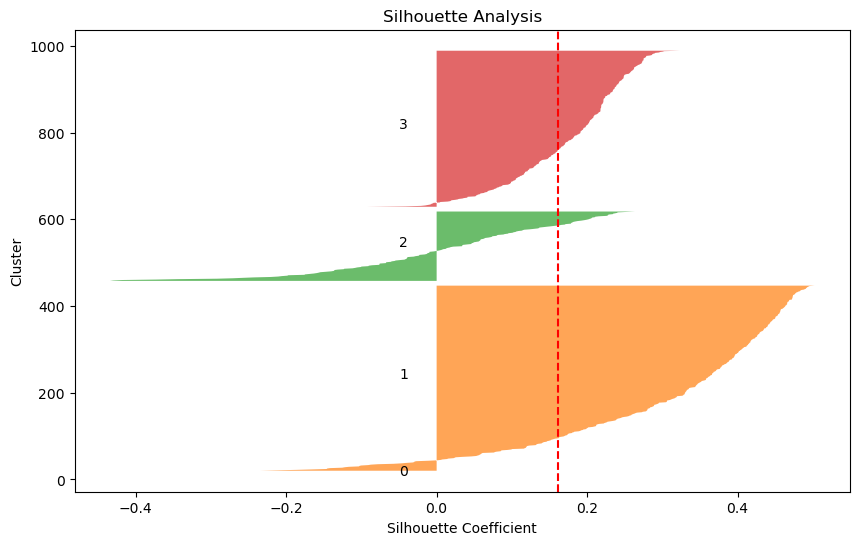

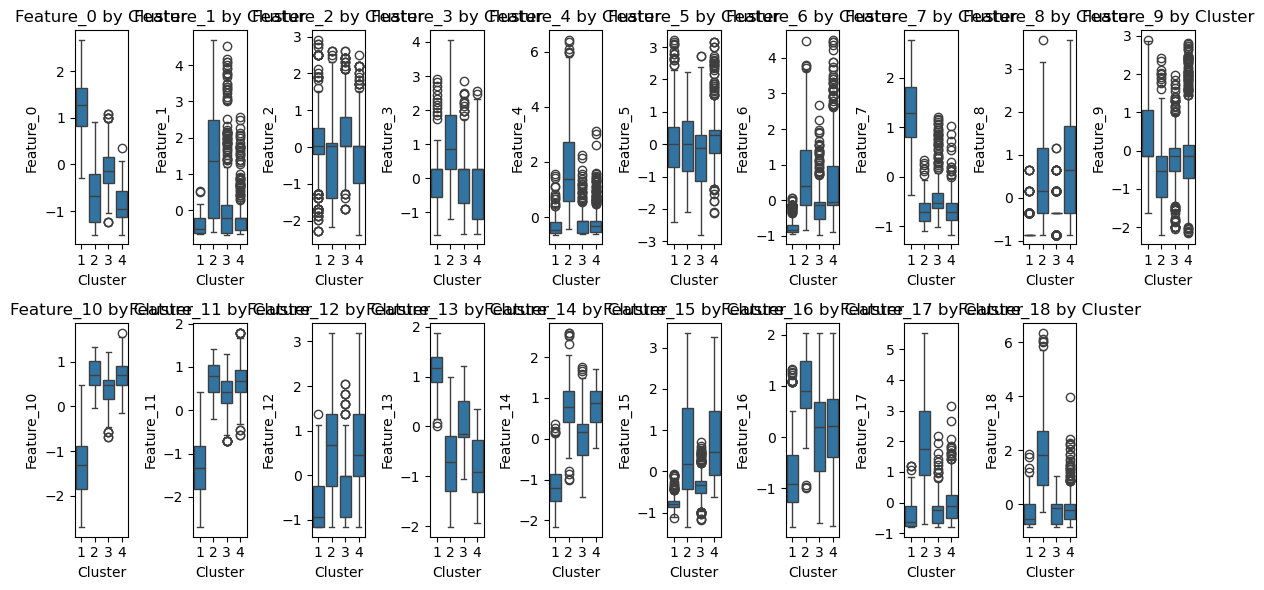

{'internal_metrics': {'silhouette_score': 0.1609738731239196,
  'calinski_harabasz_score': 373.58179050928135,
  'davies_bouldin_score': 1.9160012791423076},
 'external_metrics': {},
 'n_clusters': 4,
 'cluster_sizes': {4: 457, 1: 428, 3: 361, 2: 161}}

In [133]:
# Evaluate Hierarchical Clustering
evaluator.evaluate_clustering(clusters_hierarchical, "Hierarchical")



Evaluation Results for DBSCAN
--------------------------------------------------

Internal Metrics:
silhouette_score: -0.357
calinski_harabasz_score: 5.074
davies_bouldin_score: 1.847

Cluster Sizes:
Cluster -1: 1283 samples
Cluster 5: 26 samples
Cluster 4: 13 samples
Cluster 3: 12 samples
Cluster 6: 11 samples
Cluster 0: 10 samples
Cluster 1: 10 samples
Cluster 8: 8 samples
Cluster 7: 7 samples
Cluster 11: 7 samples
Cluster 2: 5 samples
Cluster 10: 5 samples
Cluster 9: 5 samples
Cluster 12: 5 samples


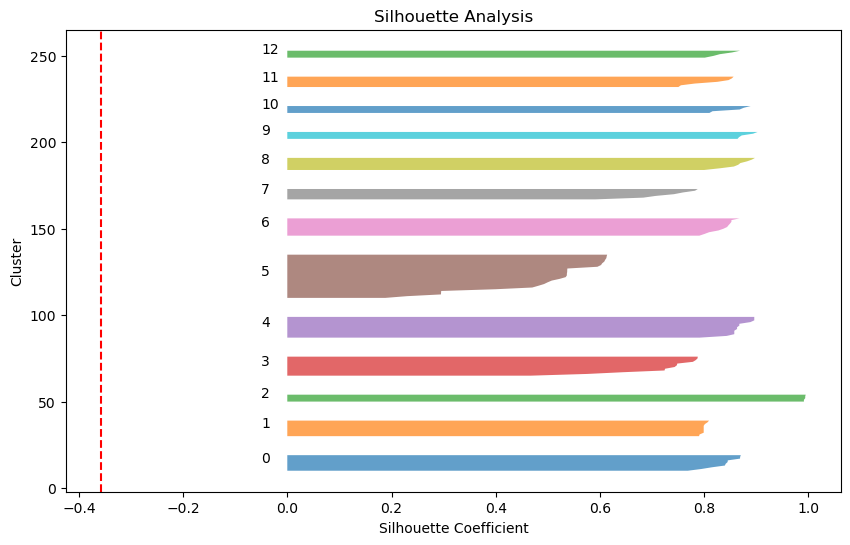

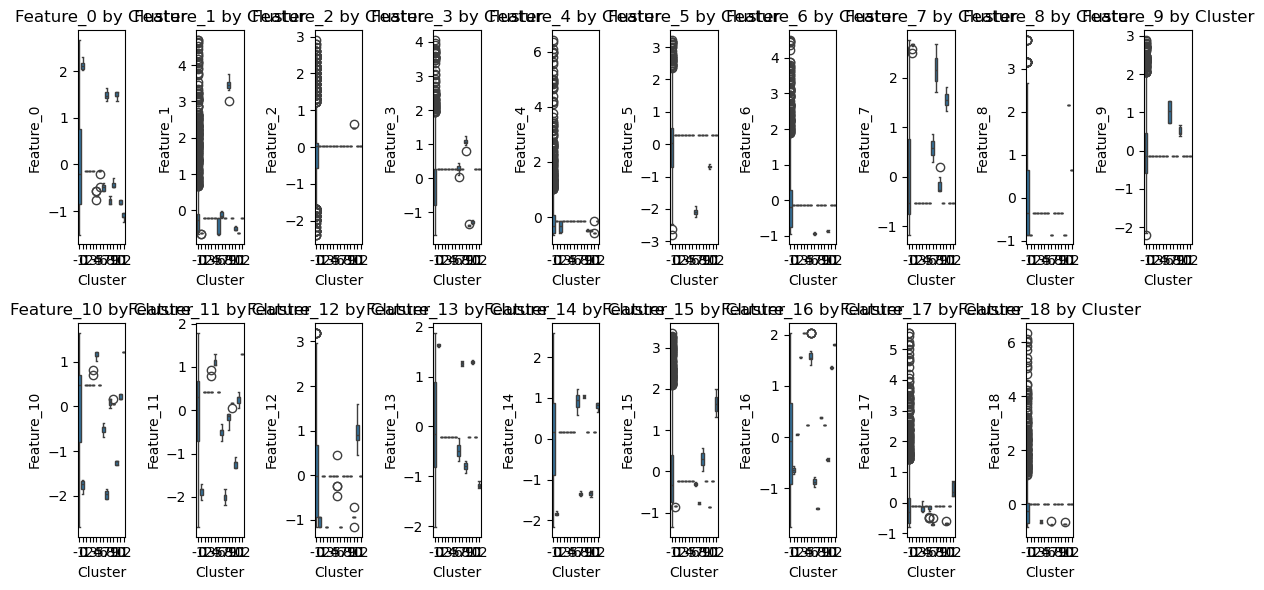

{'internal_metrics': {'silhouette_score': -0.3573078247395766,
  'calinski_harabasz_score': 5.074110537065711,
  'davies_bouldin_score': 1.8467331046035327},
 'external_metrics': {},
 'n_clusters': 13,
 'cluster_sizes': {-1: 1283,
  5: 26,
  4: 13,
  3: 12,
  6: 11,
  0: 10,
  1: 10,
  8: 8,
  7: 7,
  11: 7,
  2: 5,
  10: 5,
  9: 5,
  12: 5}}

In [135]:
# Evaluate DBSCAN Clustering
evaluator.evaluate_clustering(clusters_dbscan, "DBSCAN")



Evaluation Results for Agglomerative
--------------------------------------------------

Internal Metrics:
silhouette_score: 0.161
calinski_harabasz_score: 373.582
davies_bouldin_score: 1.916

Cluster Sizes:
Cluster 0: 457 samples
Cluster 3: 428 samples
Cluster 1: 361 samples
Cluster 2: 161 samples


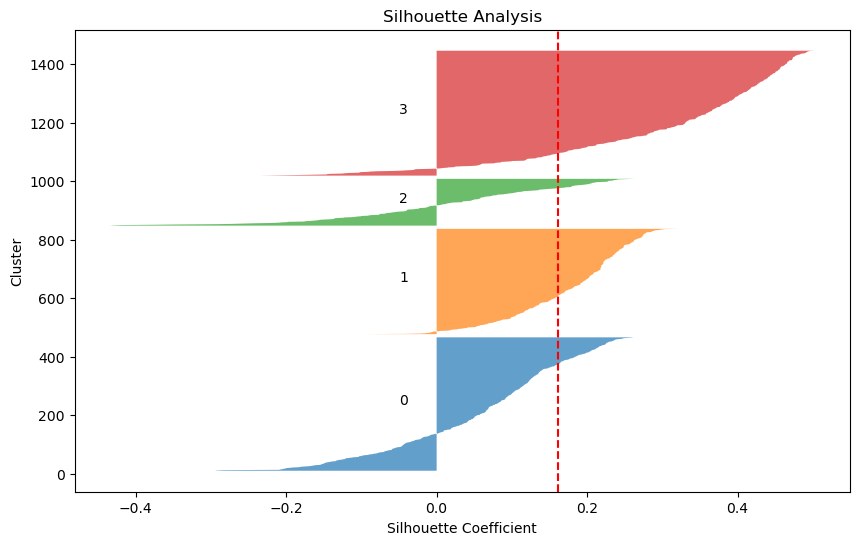

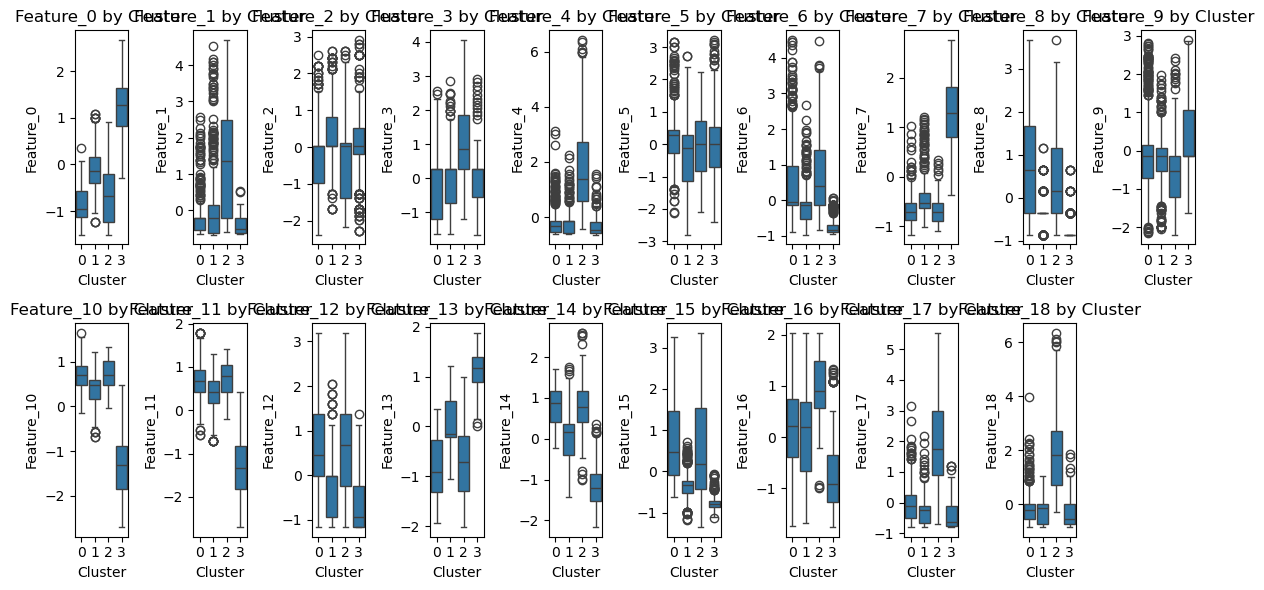

{'internal_metrics': {'silhouette_score': 0.1609738731239196,
  'calinski_harabasz_score': 373.58179050928135,
  'davies_bouldin_score': 1.9160012791423076},
 'external_metrics': {},
 'n_clusters': 4,
 'cluster_sizes': {0: 457, 3: 428, 1: 361, 2: 161}}

In [137]:
# Evaluate Agglomerative Clustering
evaluator.evaluate_clustering(clusters_agglo, "Agglomerative")


In [139]:
# Check stability of K-Means clustering using the ClusterEvaluator's cluster_stability method
stability_results = evaluator.cluster_stability(
    lambda x, **kwargs: KMeans(n_clusters=4).fit_predict(x)
)

# Output the K-means stability results
print("\nK-means Stability Results:")
print(f"Mean stability: {stability_results['mean_stability']:.3f}")
print(f"Stability std: {stability_results['std_stability']:.3f}")



K-means Stability Results:
Mean stability: -0.000
Stability std: 0.002
